# Приоритизация гипотез и анализ A/B теста в крупном интернет-магазине.

Вместе с отделом маркетинга были подготовлен список гипотез для увелечения выручки, **необходимо приотизировать гипотезы, запустить A/B тест и проанализировать результаты.**

Исследование будет проходить в 5 этапов:

1) Обзор данных. Данные хранятся в трех датасетах. Файл `hypothesis.csv` содержит информацию о 9 гипотезах по увелечению выручки интернет-магазина. Датасеты `orders.csv` и `visitors.csv` содержат информацию о результатах проведенных А/В тестов.  Необходимо проверить данные в датасетах на наличие пропуском и корректность заполнения.

2) Предобработка данных. Выявленные в предыдущем этапе пропуски и ошибки, необходимо по возможности заполнить или удалить.

3) Приоритизация гипотез.

 * Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
 * Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
 * Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

4) Анализ A/B-теста.

  1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.

  2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.

  3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.

  4. Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.

  5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.

  6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.

  7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.

  8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.

  9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.

  10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.

  11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.

  12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.

  13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

  14. Принять решение по результатам теста и объясните его.
     
5)  Общий вывод. Подведение итогов по выполненному исследованию.

# Обзор данных

Подключаем библиотеки и импортируем базы данных `hypothesis.csv`, `orders.csv`, `visitors.csv`

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib
import seaborn as sns
from scipy import stats as st
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import os

In [ ]:
pth1 = 'hypothesis.csv'
pth2 = '/datasets/hypothesis.csv'

if os.path.exists(pth1):
    hypothesis = pd.read_csv(pth1)
elif os.path.exists(pth2):
    hypothesis = pd.read_csv(pth2)
else:
    print('Something is wrong')

pth3 = 'orders.csv'
pth4 = '/datasets/orders.csv'

if os.path.exists(pth3):
    orders = pd.read_csv(pth3)
elif os.path.exists(pth4):
    orders = pd.read_csv(pth4)
else:
    print('Something is wrong')

pth5 = 'visitors.csv'
pth6 = '/datasets/visitors.csv'

if os.path.exists(pth5):
    visitors = pd.read_csv(pth5)
elif os.path.exists(pth6):
    visitors = pd.read_csv(pth6)
else:
    print('Something is wrong')

Выводим общую информацию по таблице hypothesis

In [ ]:
hypothesis.info()
print('\nКоличество пропусков в таблице\n',orders.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

Количество пропусков в таблице
 transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


В таблице 5 столбцов с типами данных — int, object

 * Hypothesis — краткое описание гипотезы,
 * Reach — охват пользователей по 10-балльной шкале,
 * Impact — влияние на пользователей по 10-балльной шкале,
 * Confidence — уверенность в гипотезе по 10-балльной шкале,
 * Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

 Количество значений в столбцах не различаются, следовательно **нет пропущенных значений**

Выведем всю таблицу `hypothesis`

In [ ]:
hypothesis.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [ ]:
hypothesis['Hypothesis'].tolist()

['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
 'Запустить собственную службу доставки, что сократит срок доставки заказов',
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
 'Запустить акцию, дающую скидку на товар в день рождения']

Выводим общую информацию по таблице orders

In [ ]:
orders.info()
print('\nКоличество пропусков в таблице\n',orders.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

Количество пропусков в таблице
 transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


В таблице 5 столбцов с типами данных — int, object

 * transactionId — идентификатор заказа,
 * visitorId — идентификатор пользователя, совершившего заказ,
 * date — дата, когда был совершён заказ,
 * revenue — выручка заказа,
 * group — группа A/B-теста, в которую попал заказ.

Количество значений в столбцах не различаются, следовательно **нет пропущенных значений**

In [ ]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Выводим общую информацию по таблице visitors

In [ ]:
visitors.info()
print('\nКоличество пропусков в таблице\n',visitors.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

Количество пропусков в таблице
 date        0
group       0
visitors    0
dtype: int64


В таблице 3 столбца с типами данных — int, object

 * date — дата,
 * group — группа A/B-теста,
 * visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

Количество значений в столбцах не различаются, следовательно **нет пропущенных значений**

In [ ]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


## Вывод

При ознакомлении с датафреймами было установленно, что `hypothesis.csv` хранит информацию о гипотезах их их оценки по охвату пользователей, влиянию на пользователей, уверености в гипотезе и затратам на проверку, все оценивается по 10-балльной шкале.

Датафрейм `orders.csv` содержит информацию о совершенных заказах, пользовательские iD и деление заказов на группы A и B.

Датафрейм `visitors.csv` содержит информацию о том сколько человек и в какую дату попали в определенную группу тестирования(A и B).

Во всех датафреймах отсутствуют пропуски, это говорит нам о том, что сбоев в сборе данных нет. На стадии предобработки необходимо:

1. Выявить явные и неявные дубликаты, исправить либо удалить их, если они есть
2. Выявить аномальные значения, исправить либо удалить, если они есть
3. Привести названия столбцов к единому стилю

# Предобработка данных

Создадим новый столбец с названия гипотезы для дальнейшего удобства в анализе

In [ ]:
hypothesis['name'] = ['hypothesis1','hypothesis2','hypothesis3',
                      'hypothesis4','hypothesis5','hypothesis6','hypothesis7','hypothesis8','hypothesis9']
hypothesis = hypothesis[['name'] + [x for x in hypothesis.columns if x != 'name']]

In [ ]:
hypothesis.head()

,name,Hypothesis,Reach,Impact,Confidence,Efforts
0,hypothesis1,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,hypothesis2,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,hypothesis3,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,hypothesis4,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,hypothesis5,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Приведем к единому стилю названия столбцов в датафреймах

In [ ]:
hypothesis.columns = map(str.lower, hypothesis.columns)
orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace = True )

print(hypothesis.columns)
print()
print(orders.columns)

Index(['name', 'hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


Проверим наличие явных дубликатов

In [ ]:
print('Дубликаты в hypothesis',hypothesis.duplicated().sum())
print('Дубликаты в orders',orders.duplicated().sum())
print('Дубликаты в visitors',visitors.duplicated().sum())

Дубликаты в hypothesis 0
Дубликаты в orders 0
Дубликаты в visitors 0


Посмотрим даты начала А/В теста

In [ ]:
print('Начало А/В теста',visitors['date'].min())
print('Последня дата А/В теста',visitors['date'].max())

Начало А/В теста 2019-08-01
Последня дата А/В теста 2019-08-31


In [ ]:
print('Первая покупка в датафрейме совершена',orders['date'].min())
print('Последня покупка в датафрейме совершена',orders['date'].max())

Первая покупка в датафрейме совершена 2019-08-01
Последня покупка в датафрейме совершена 2019-08-31


Лишние даты не попали в датафрейм

Посмотрим распределение по группам в датафрейме `visitors`

In [ ]:
print(visitors.value_counts('group'))
visitors.value_counts('date')

group
A    31
B    31
dtype: int64


date
2019-08-01    2
2019-08-17    2
2019-08-30    2
2019-08-29    2
2019-08-28    2
2019-08-27    2
2019-08-26    2
2019-08-25    2
2019-08-24    2
2019-08-23    2
2019-08-22    2
2019-08-21    2
2019-08-20    2
2019-08-19    2
2019-08-18    2
2019-08-16    2
2019-08-02    2
2019-08-15    2
2019-08-14    2
2019-08-13    2
2019-08-12    2
2019-08-11    2
2019-08-10    2
2019-08-09    2
2019-08-08    2
2019-08-07    2
2019-08-06    2
2019-08-05    2
2019-08-04    2
2019-08-03    2
2019-08-31    2
dtype: int64

С делением на группы тестируемых все нормально

Посмотрим как распределилось количество пользователей по группам и посчитаем разницу

In [ ]:
users_group = orders.groupby('group').agg({'visitor_id':'nunique'}).reset_index()
display(users_group)
print('Разница между группами',int(users_group.loc[users_group['group']=='B']['visitor_id']) \
      - int(users_group.loc[users_group['group']=='A']['visitor_id']),'человек')
print('Разница между группами',round(int(users_group.loc[users_group['group']=='B']['visitor_id']) \
      / int(users_group.loc[users_group['group']=='A']['visitor_id'])*100-100,2),'%')

,group,visitor_id
0,A,503
1,B,586


Разница между группами 83 человек
Разница между группами 16.5 %


Посмотрим выручку с заказов

In [ ]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

Медианное значения выручки c одного заказа 2978, минимальное 50, максимальное 1294500, вследствии чего происходит сильное искажение среднего значения 8348.

Посмотрим, есть ли пользователи, которые попали в две группы теста, если да то их необходимо удалить

In [ ]:
orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group>1').count()
double_users = orders.groupby('visitor_id').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitor_id'].unique()
print(len(double_users))
orders = orders.query('visitor_id not in @double_users')

58


Посчитаем разницу между группами после удаления пользователей попавших в обе группы теста

In [ ]:
users_group = orders.groupby('group').agg({'visitor_id':'unique', 'visitor_id':'count'}).reset_index()
display(users_group)
print('Разница между группами',int(users_group.loc[users_group['group']=='B']['visitor_id']) \
      - int(users_group.loc[users_group['group']=='A']['visitor_id']),'человек')
print('Разница между группами',round(int(users_group.loc[users_group['group']=='B']['visitor_id']) \
      / int(users_group.loc[users_group['group']=='A']['visitor_id'])*100-100,2),'%')

,group,visitor_id
0,A,468
1,B,548


Разница между группами 80 человек
Разница между группами 17.09 %


## Вывод

При проведении предобработки данных были изменены названия столбцов и приведены к общему виду (snake_case).
Пропусков и дубликатов в данных не обнаруженно, что говорит о том что данные собираются корректно. Была обнаруженна аномально большая покупка на сумму 1294500. Так же выявленно, что пользователи для проведения А/В теста неправильно распределялись по группам и могли оказаться одновременно в двух группах, что не допустимо.

# Приоритизация гипотез

Приоритизация гипотез будем проводить по методу ICE(от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») и его модификации RICE(где R от англ. reach, «охват») по формуле:

ICE = (Impact x Confidence) / Efforts

RICE = (Reach x Impact x Confidence) / Efforts

In [ ]:
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'],2)

In [ ]:
hypothesis.sort_values('ice', ascending=False).head()

,name,hypothesis,reach,impact,confidence,efforts,ice
8,hypothesis9,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,hypothesis1,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,hypothesis8,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,hypothesis7,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,hypothesis3,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00


При приоритизации гипотез фреймворком ICE гипотеза **"Запустить акцию, дающую скидку на товар в день рождения"** показывает самую высокую оценку, за ней идут гипотезы **"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"** и **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"**.

In [ ]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [ ]:
hypothesis.sort_values('rice', ascending=False).head()

,name,hypothesis,reach,impact,confidence,efforts,ice,rice
7,hypothesis8,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,hypothesis3,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,hypothesis1,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,hypothesis7,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,hypothesis9,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2


При подсчете приоритизации гипотез фреймворком RICE, места распределилсь по другому с большим отрывом вышла гипотеза **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"**, так как у неё самый большой охват аудитории, который не считался в фреймворке ICE.

Следующими по приоритету идут гипотезы **"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"**, и с равным приоритетом **"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"** и **"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"**.

## Вывод

Для дальнейшего проведения А/В теста, с помощью фреймворков ICE и RICE необходимо было выбрать гипотезу. Предпочтение было отдано гипотезе **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"**, так как у неё самый высокий приоритет по фреймворку RICE, который учитывал оценку охвата аудитории.

# Анализ A/B-теста

Чтобы исключить проблему подсматривания построим и посмотрим графики кумулятивных данных. Для этого создадим отдельный датафрейм `cumulativeData `, куда соберем все кумулятивные данные и построим графики.

Объявим датафрейм `cumulativeData` со столбцами:

* date — дата;

* group — группа A/B-теста (A или B);

* orders — кумулятивное количество заказов на указанную дату в указанной группе;

* buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;

* revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);

* visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [ ]:
cumulativeData = pd.DataFrame(columns=['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'])

Преобразуем строковые значения в даты

In [ ]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Создадим массив уникальных пар значений дат и групп

In [ ]:
datesGroups = visitors[['date', 'group']]

Посчитаем кумулятивные данные по заказам и поситителях интернет-магазина. Объединим все в один датафрейм

In [ ]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


## График кумулятивной выручки по группам

Построим график с кумулятивной выручкой по дням и группам

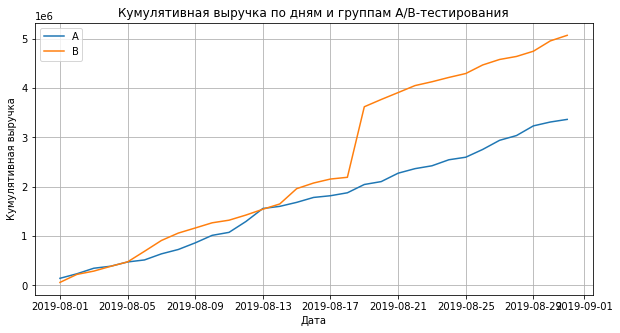

In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title("Кумулятивная выручка по дням и группам A/B-тестирования")
plt.xlabel("Дата")
plt.ylabel("Кумулятивная выручка")
plt.grid()
plt.legend()
plt.show()

Выручка почти равномерно увеличивается в течении всего теста до 2019-08-18, в эту дату было совершена покупка на сумму 1294500, что повлекло за собой резкий скачок в кумулятивной выручки у группы В.

## График кумулятивного среднего чека по группам

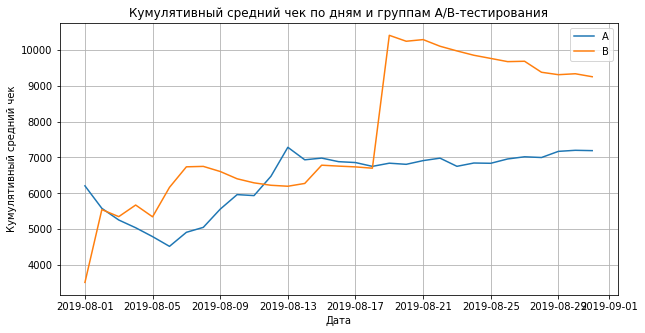

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title("Кумулятивный средний чек по дням и группам A/B-тестирования")
plt.xlabel("Дата")
plt.ylabel("Кумулятивный средний чек")
plt.grid()
plt.legend()
plt.show()

На графике видно, что средний чек в группе А установился, в то время как для В после резкого скочка он начал падать. Группе В нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

## График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека.

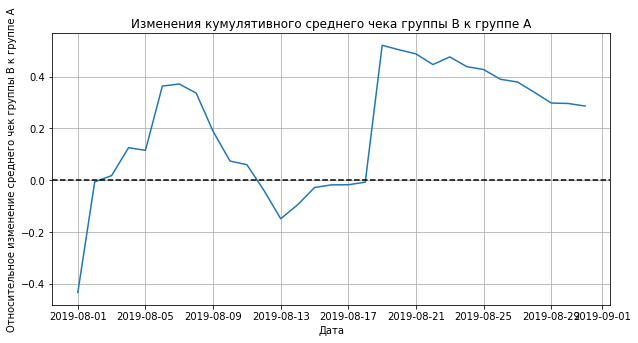

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)


plt.axhline(y=0, color='black', linestyle='--')
plt.title("Изменения кумулятивного среднего чека группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение среднего чек группы B к группе A")
plt.grid()
plt.show()

В нескольких точках графика заметны большие скачки. Это значит что в данные дни оформлялось большое количество заказов или были крупные покупки. Средний чек группы В сильно превышает чек группы А, но в последние дни наблюдается спад.

## График кумулятивного среднего количества заказов на посетителя по группам

Построим график кумулятивного среднего количества заказов на посетителя по группам

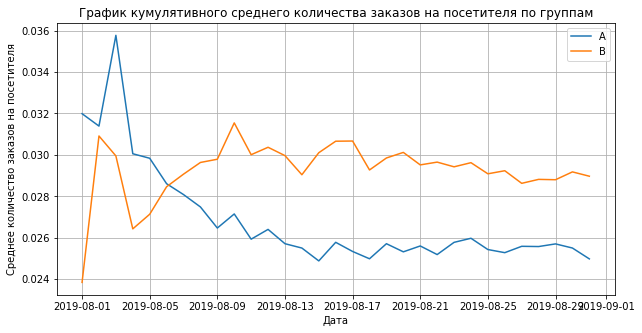

In [ ]:
cumulativeVisitorsA = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]


cumulativeVisitorsB = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]

plt.figure(figsize=(10, 5))
plt.plot(cumulativeVisitorsA['date'], cumulativeVisitorsA['orders']/cumulativeVisitorsA['visitors'], label='A')
plt.plot(cumulativeVisitorsB['date'], cumulativeVisitorsB['orders']/cumulativeVisitorsB['visitors'], label='B')
plt.title("График кумулятивного среднего количества заказов на посетителя по группам")
plt.xlabel("Дата")
plt.ylabel("Среднее количество заказов на посетителя")
plt.grid()
plt.legend()
plt.show()

На графике видно, что среднее количество заказов в группе А составляет 0.026, у B оно больше составляет около 0.030. Среднее количество в группе А начало падать после 2019-08-05.

## График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

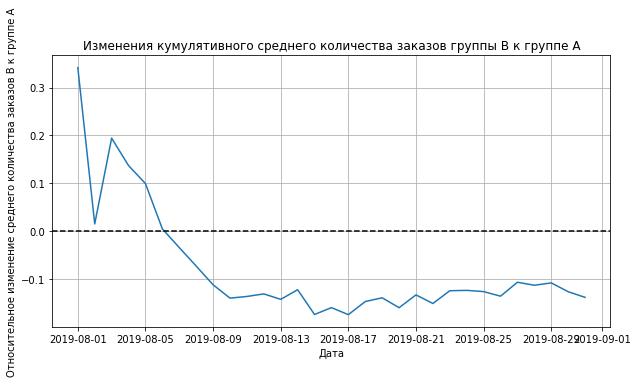

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeVisitors = cumulativeVisitorsA.merge(cumulativeVisitorsB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeVisitors['date'], (mergedCumulativeVisitors['visitorsB']/mergedCumulativeVisitors['ordersB'])/(mergedCumulativeVisitors['visitorsA']/mergedCumulativeVisitors['ordersA'])-1)


plt.axhline(y=0, color='black', linestyle='--')
plt.title("Изменения кумулятивного среднего количества заказов группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение среднего количества заказов B к группе A")
plt.grid()
plt.show()

Группа B стабильно хуже группы A в относительнои изменении среднего количества заказов, только в самом начале теста был скачок, в дальнейшем он установился и не поднимается.

## Точечный график количества заказов по пользователям

Подсчитаем количество заказов по пользователям

In [ ]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['user_id', 'orders']

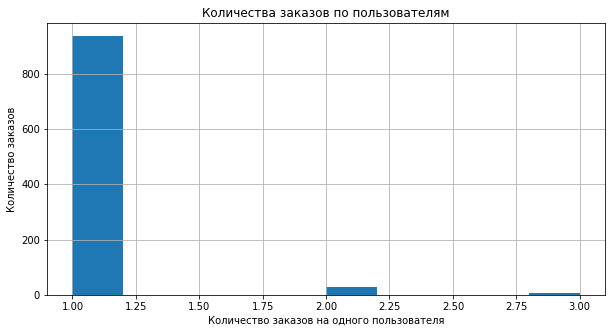

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(ordersByUsers['orders'])
plt.title("Количества заказов по пользователям")
plt.xlabel("Количество заказов на одного пользователя")
plt.ylabel("Количество заказов")
plt.grid()
plt.show()

1    937
2     29
3      7
Name: orders, dtype: int64

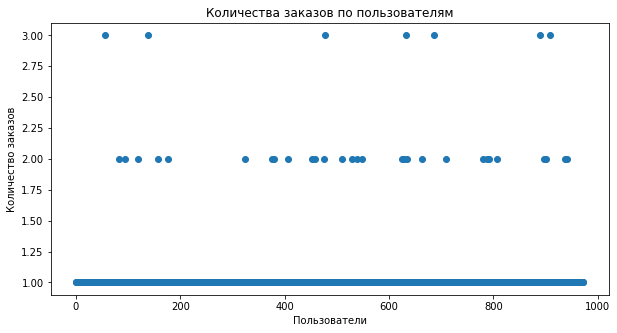

In [ ]:
display(ordersByUsers['orders'].value_counts())
plt.figure(figsize=(10, 5))
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values,ordersByUsers['orders'])
plt.title("Количества заказов по пользователям")
plt.xlabel("Пользователи")
plt.ylabel("Количество заказов")
plt.show()

В основном пользователи совершали одну покупку (937 человек), всего 29 человека совершли две покупки. Можно сделать вывод, что люди редко совершают более одной покупки в месяц.

## 95-й и 99-й перцентили количества заказов на пользователя

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей.

In [ ]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 1. 2.]


Не более 5% пользователей оформляли больше 1 заказов. За верхнюю границу числа заказов выбираем 1 заказ, это позволит нам отсеять аномальных пользователей.

## Точечный график стоимостей заказов

Построим точечный график стоимостей заказов

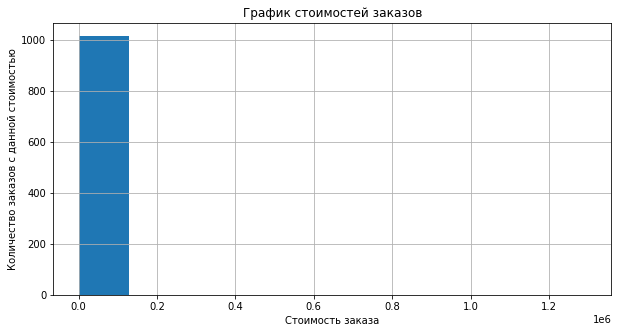

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(orders['revenue'])
plt.title("График стоимостей заказов")
plt.xlabel("Стоимость заказа")
plt.ylabel("Количество заказов с данной стоимостью")
plt.grid()
plt.show()

Заказ стоимостью 1294500, не позволяет построить график исключим его и построим новый новый

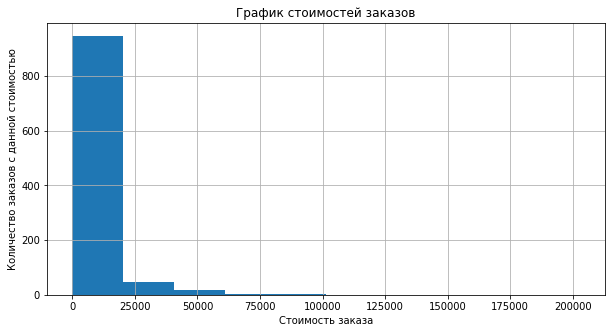

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(orders.query('revenue!=1294500')['revenue'])
plt.title("График стоимостей заказов")
plt.xlabel("Стоимость заказа")
plt.ylabel("Количество заказов с данной стоимостью")
plt.grid()
plt.show()

Большинство заказов стоит меньше 25000, но бывают и исключения в 50000, 75000 и даже 190000

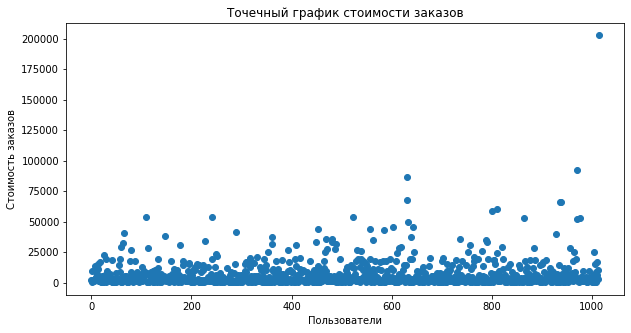

In [ ]:
x_values = pd.Series(range(0,len(orders.query('revenue!=1294500')['revenue'])))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders.query('revenue!=1294500')['revenue'])
plt.title("Точечный график стоимости заказов")
plt.xlabel("Пользователи")
plt.ylabel("Стоимость заказов")
plt.show()

По графику видно, что большая часть стоимости заказов распологается до 25000, но бывают и аномально крупные заказы.

## Посчитать 95-й и 99-й перцентили стоимости заказов

Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберим границу для определения аномальных пользователей.

In [ ]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[17990. 26785. 53904.]


Не более 5% заказов дороже 26785 и не более 1% 53904. За верхнюю границу стоимости заказов выбираем 26785, это позволит нам отсеять аномальных пользователей.

## Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Для проверки гипотез будет выбран U-критерий Манна-Уитни, так как в данных имеются большие выбросы (сумма заказов).

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов на посетителя между группами нет. Альтернативная: различия в среднем заказе на посетителя между группами есть.

Посчитаем количество заказов, суммарную выручку, суммарное число заказов, кумулятивную выручку, кумулятивное количество заказов, количество пользователей и кумулятивное количество пользователей по группам и в разрезе даты.

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами visitor_id и transaction_id. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [ ]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

display(ordersByUsersA.head())
print()
display(ordersByUsersB.head())

,visitor_id,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


,visitor_id,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Проверим кретерием Манна-Уитни

In [ ]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.loc[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.loc[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:',"{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Разница между группами по среднему количеству заказов:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
Разница между группами по среднему количеству заказов: 0.160


Первое число p-value= 0.011, оно меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный прирост среднего числа заказов на посетителя группы B равен 16%

## Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [ ]:
print('p-value:','{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Разница между группами по среднему чеку заказа:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
Разница между группами по среднему чеку заказа: 0.287


P-value больше 0.05. Значит, нет причин отвергать нулевую гипотезу. Средний чек группы В значительно выше среднего чека группы А.

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

На основании ранее проведенного анализа примем за аномальных пользователей тех, кто совершил больше 1 заказа  или совершил заказ дороже 26785. Сделаем срезы пользователей и объединим их в таблице abnormalUsers.

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Количество аномальных пользователей:',abnormalUsers.shape[0])
print('Количество аномальных в процентах от общего числа уникальных пользователей:',f"{abnormalUsers.shape[0] / orders['visitor_id'].nunique():.1%}")

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitor_id, dtype: int64
Количество аномальных пользователей: 86
Количество аномальных в процентах от общего числа уникальных пользователей: 8.8%


Всего 86 аномальных пользователей, что составляет 8.8% от общего количества уникальных пользователей. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.loc[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.loc[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:','{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Разница между группами по среднему количеству заказов:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.016
Разница между группами по среднему количеству заказов: 0.174


Результаты по среднему количеству заказов практически не изменились. P-value= 0.016, Относительный прирост числа заказов на посетителя группы B увеличился и стал 17.4%

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [ ]:
print('p-value:',
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Разница между группами по среднему чеку заказа:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.727
Разница между группами по среднему чеку заказа: -0.034


P-value уменьшился, разница между сегментами значительно сократилась с 28% до -0.3%. То есть средний чек группы В стал меньше среднего чека группы А.

# Вывод

В ходе проведения работы была приоритизирована гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", так как у неё самый высокий приоритет по фреймворку RICE, который учитывал оценку охвата аудитории.

Для неё был проведен А/В тест, в ходе которого было выявленно что, группа В имеет прирост в количестве заказов на посетителя на 17.4% больше группы А, но средний чек заказа у группы А больше на 0.3%, группа В пренисла суммарной выручке 2345477, что на  296602(~14.4%) больше группы А.

Исходя из эти данных можно сказать, что можно остановить тест, и внедрять новый функционал по добавлению формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, так как он показал хорошие результаты.

В качестве рекомендации, нужно попытаться увеличить средний чек группы В, что позволит получать больше прибыли.